In [1]:
import sys
from pathlib import Path
sys.path.append("..\..")

from src.data.matchers.intervals_matcher import IntervalsMelodyMatcher
from src.data.structures.melody import Melody

Similarity: 0.50


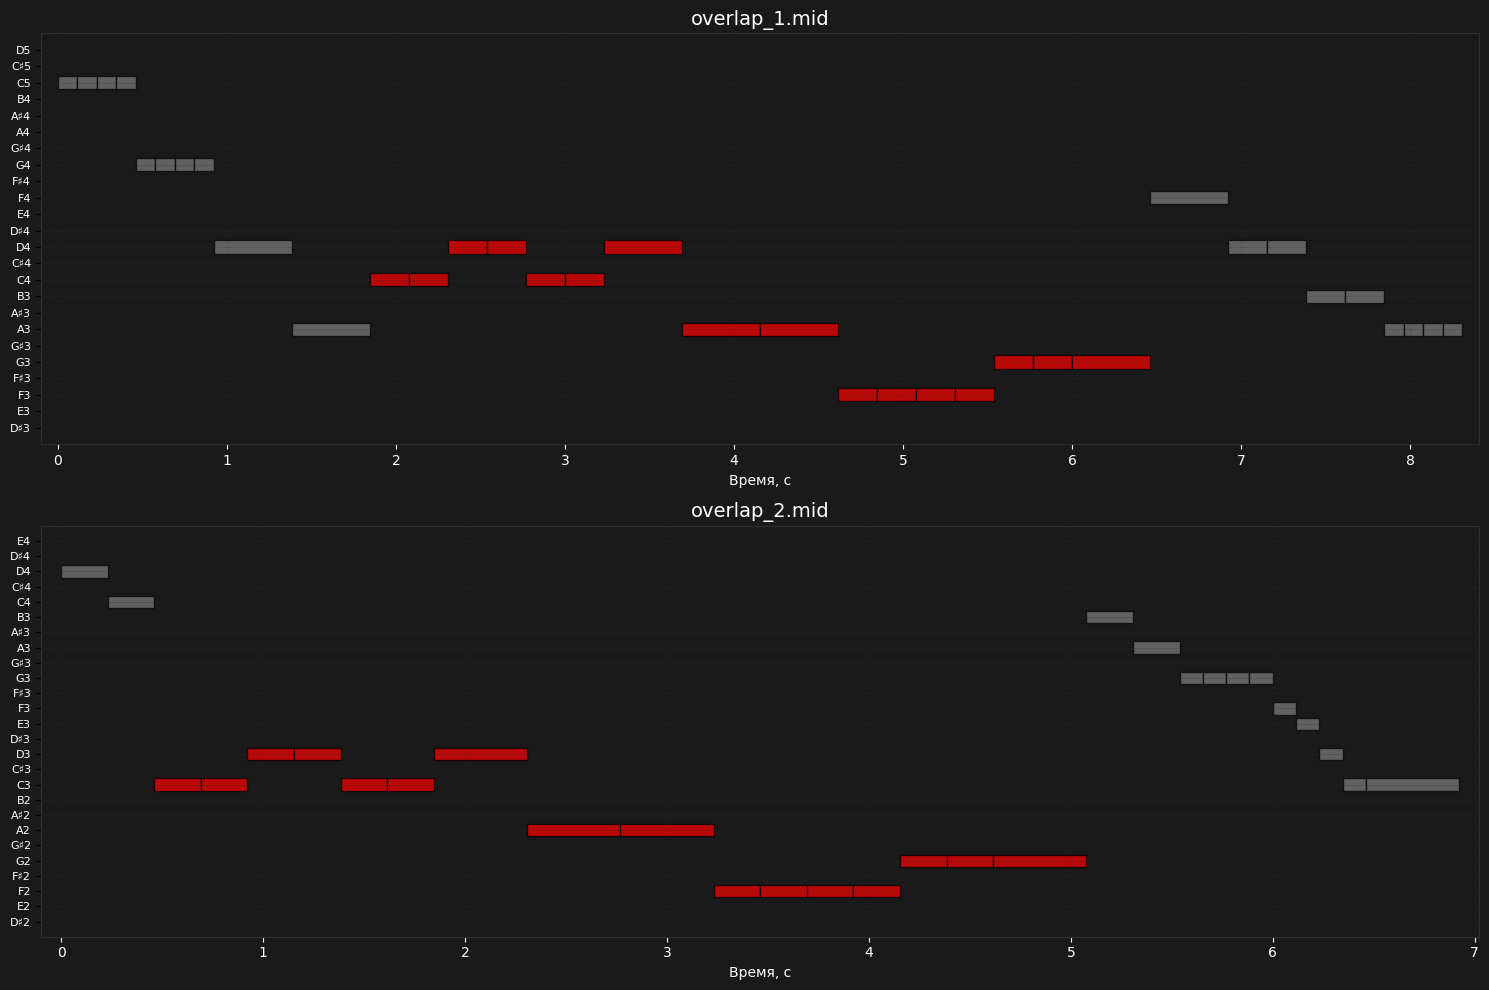

Similarity: 0.58


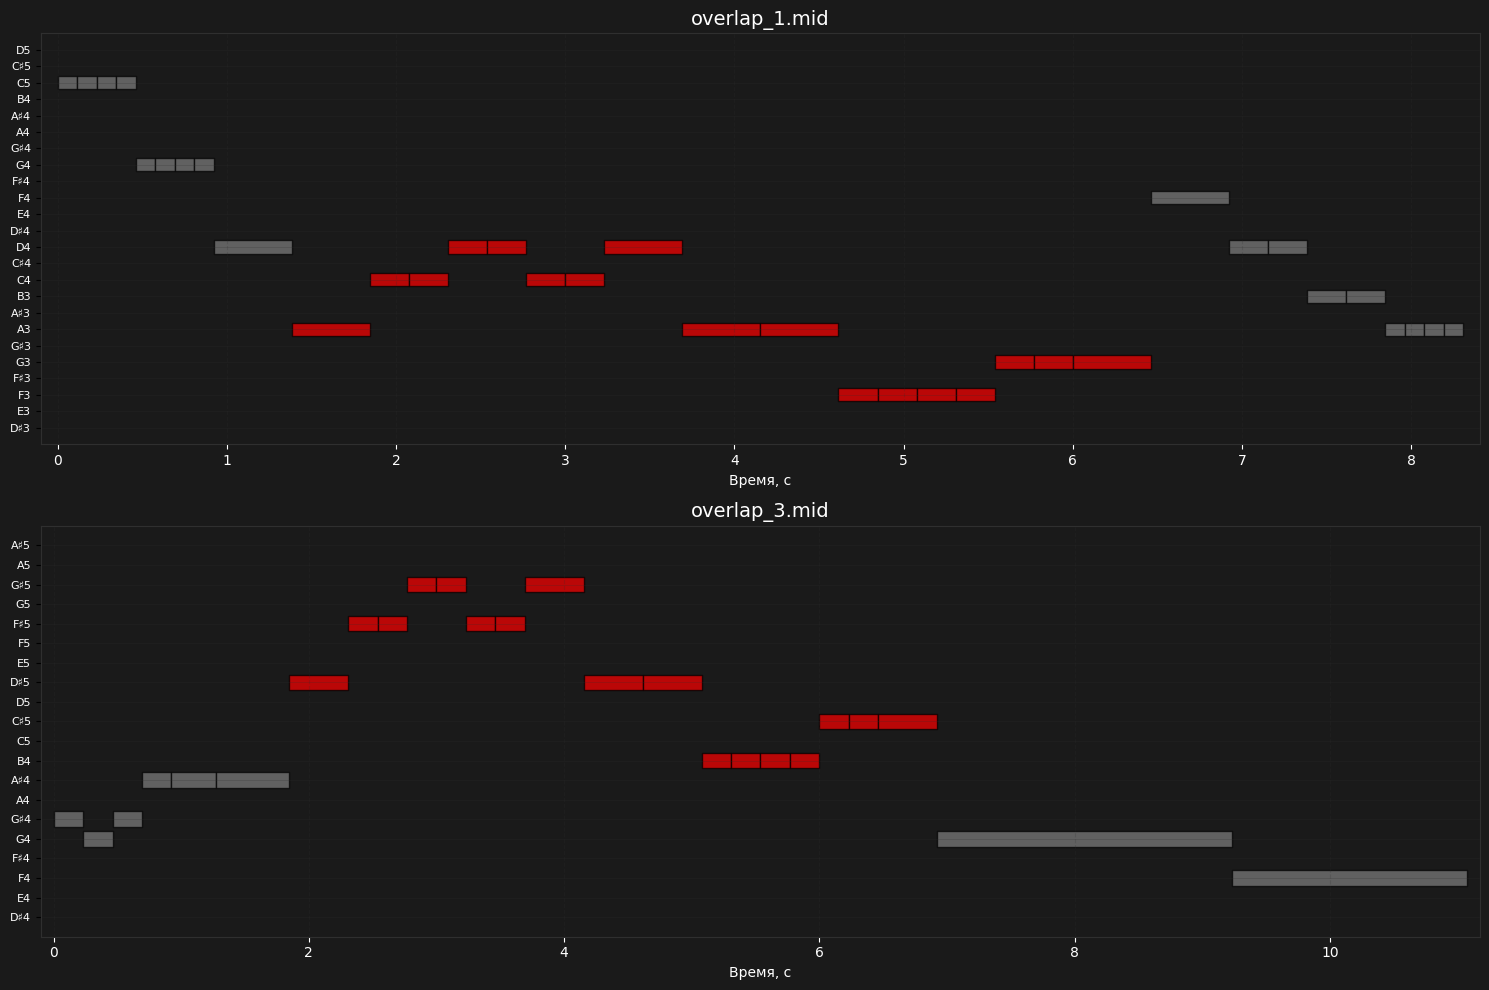

Similarity: 0.73


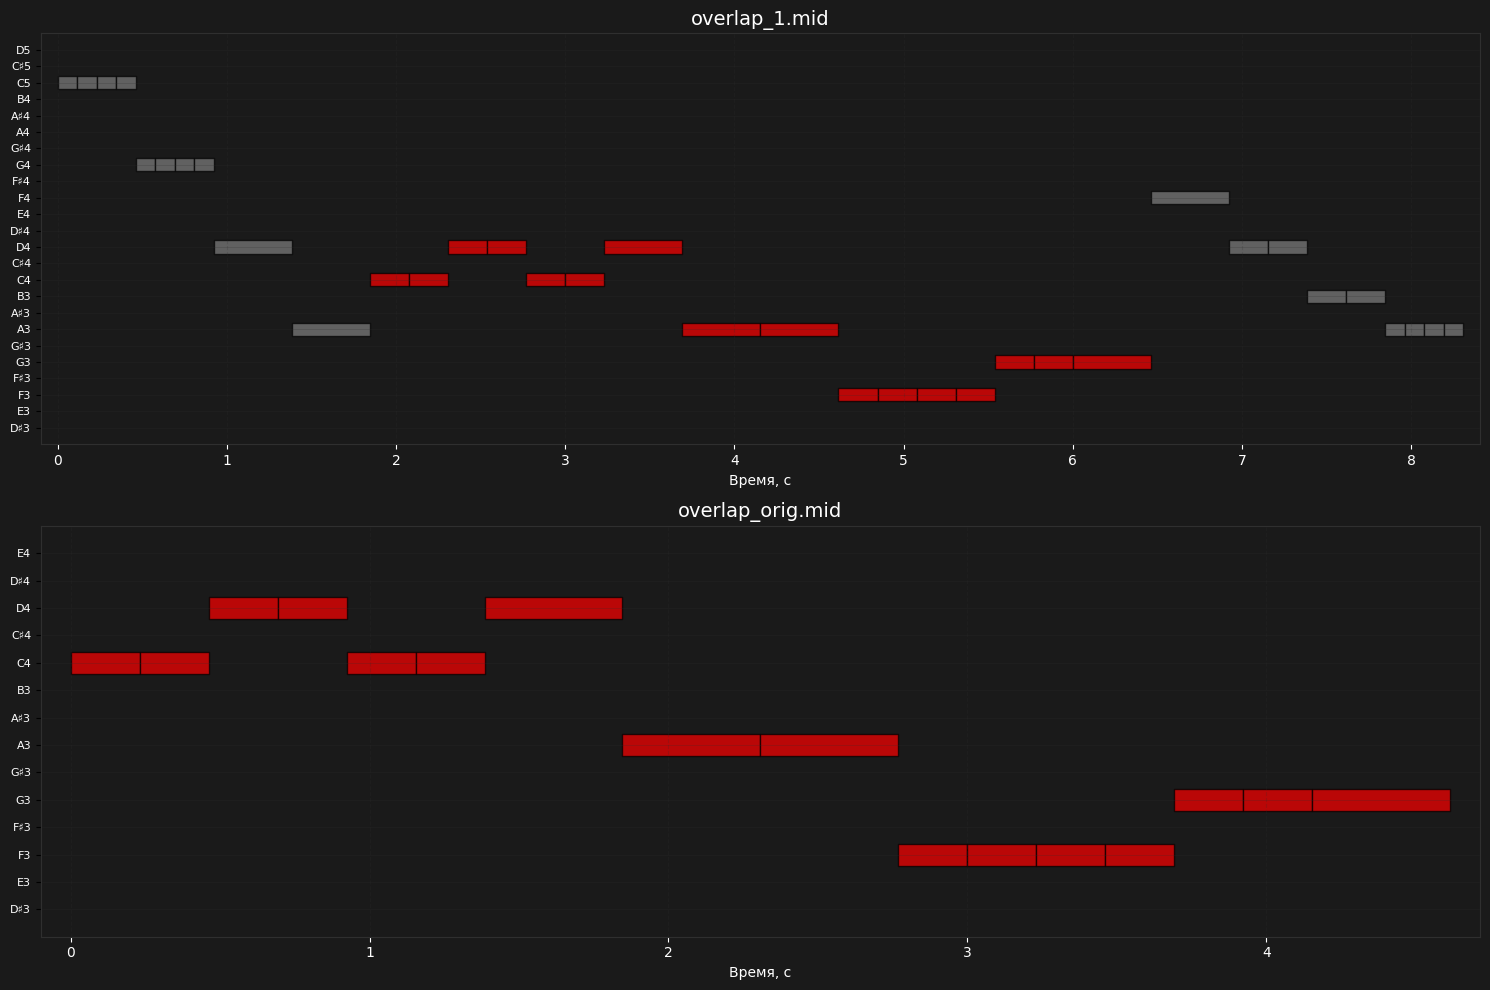

In [2]:
base_melody_path = Path("..\\..\\datasets\\MelodyNet\\test\\labels\\overlap_1.mid")
base_melody = Melody.from_midi(base_melody_path)

overlap_files = sorted([
    f for f in Path("..\\..\\datasets\\MelodyNet\\test\\labels").glob("overlap_*.mid") 
    if f.name != base_melody_path.name
])

for overlap_file in overlap_files:

    melody2 = Melody.from_midi(overlap_file)
    
    matcher = IntervalsMelodyMatcher(base_melody, melody2)
    patterns = matcher.find_patterns(min_length=7)
        
    print(f"Similarity: {matcher.calculate_similarity():.2f}")
    matcher.visualize_matches(subplot_titles=(base_melody_path.name, overlap_file.name), subplot_title_fontsize=14)

Similarity: 0.00


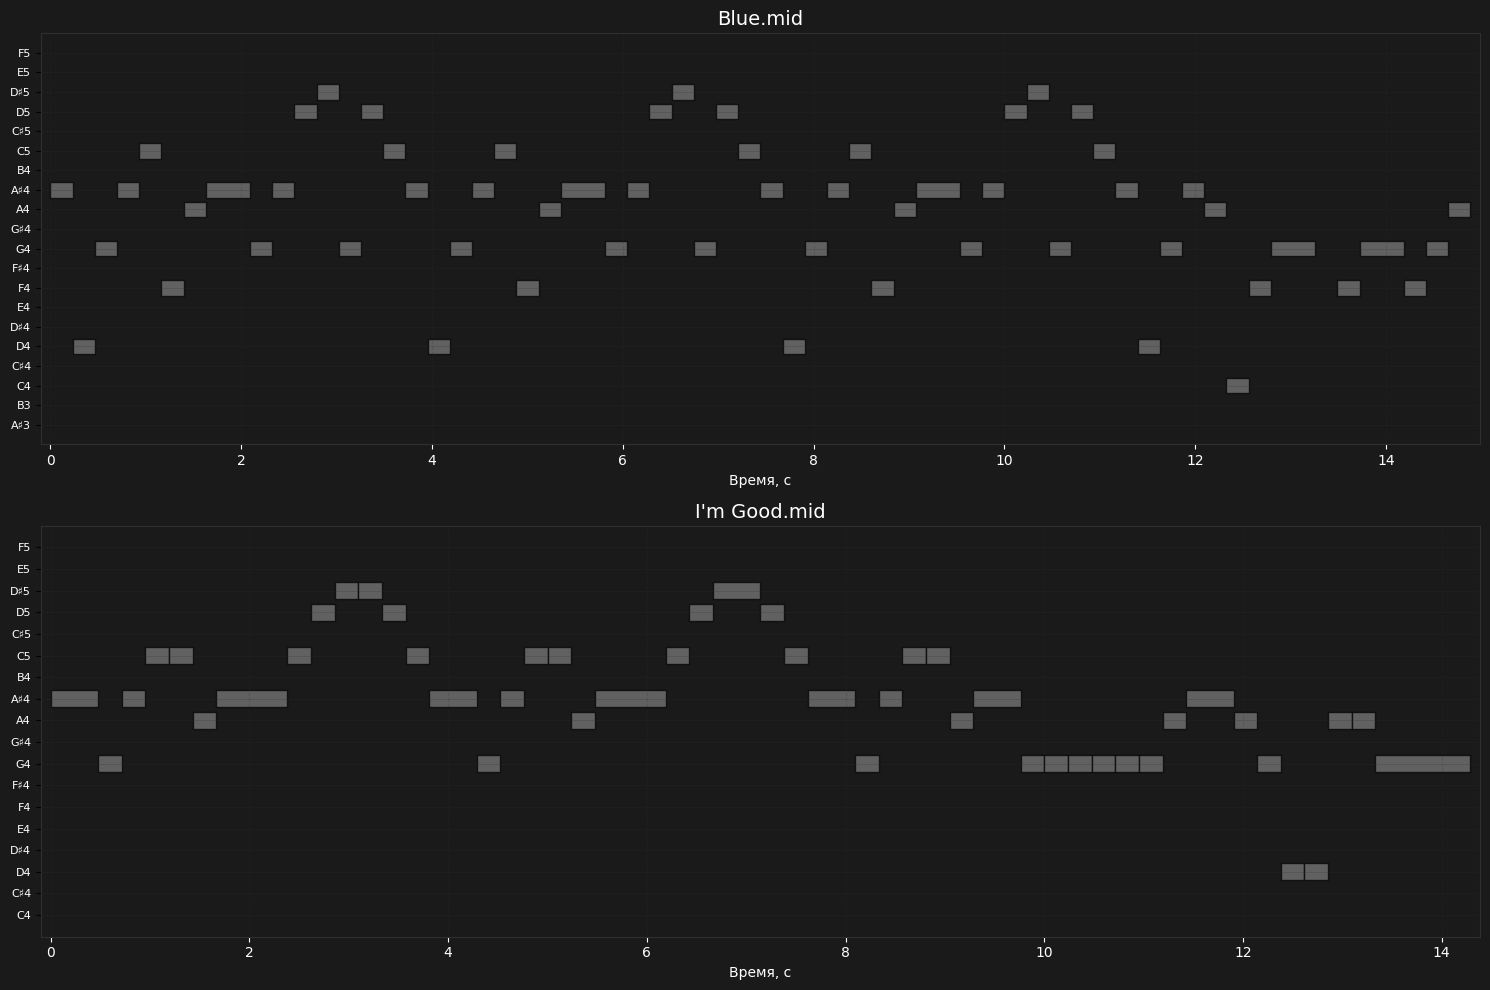

Similarity: 0.00


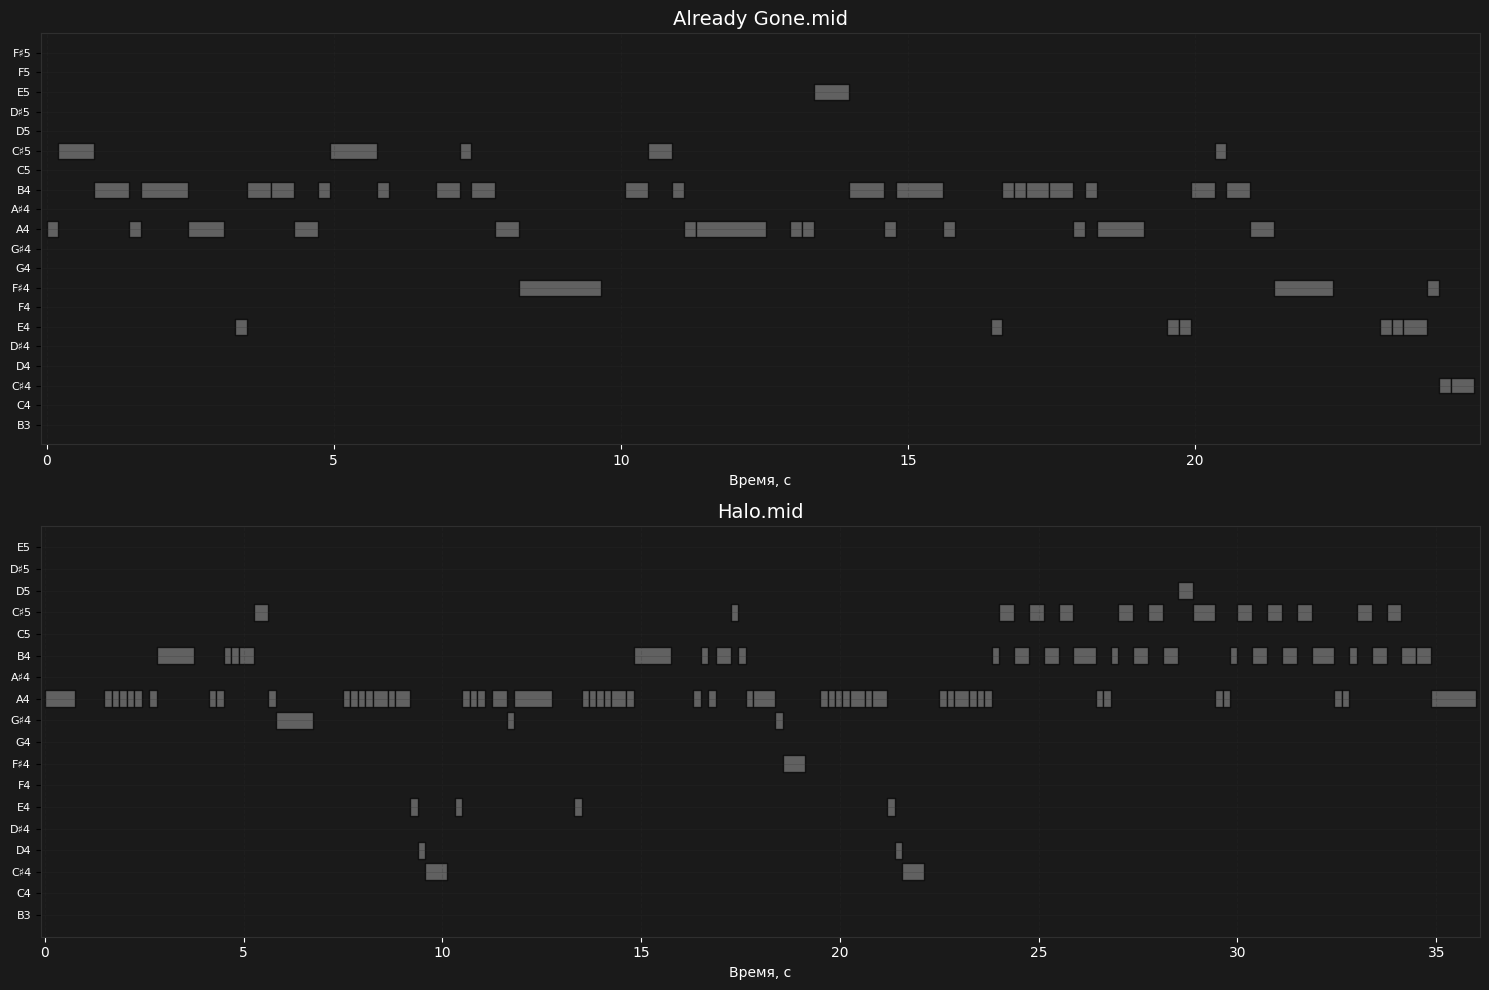

Similarity: 1.00


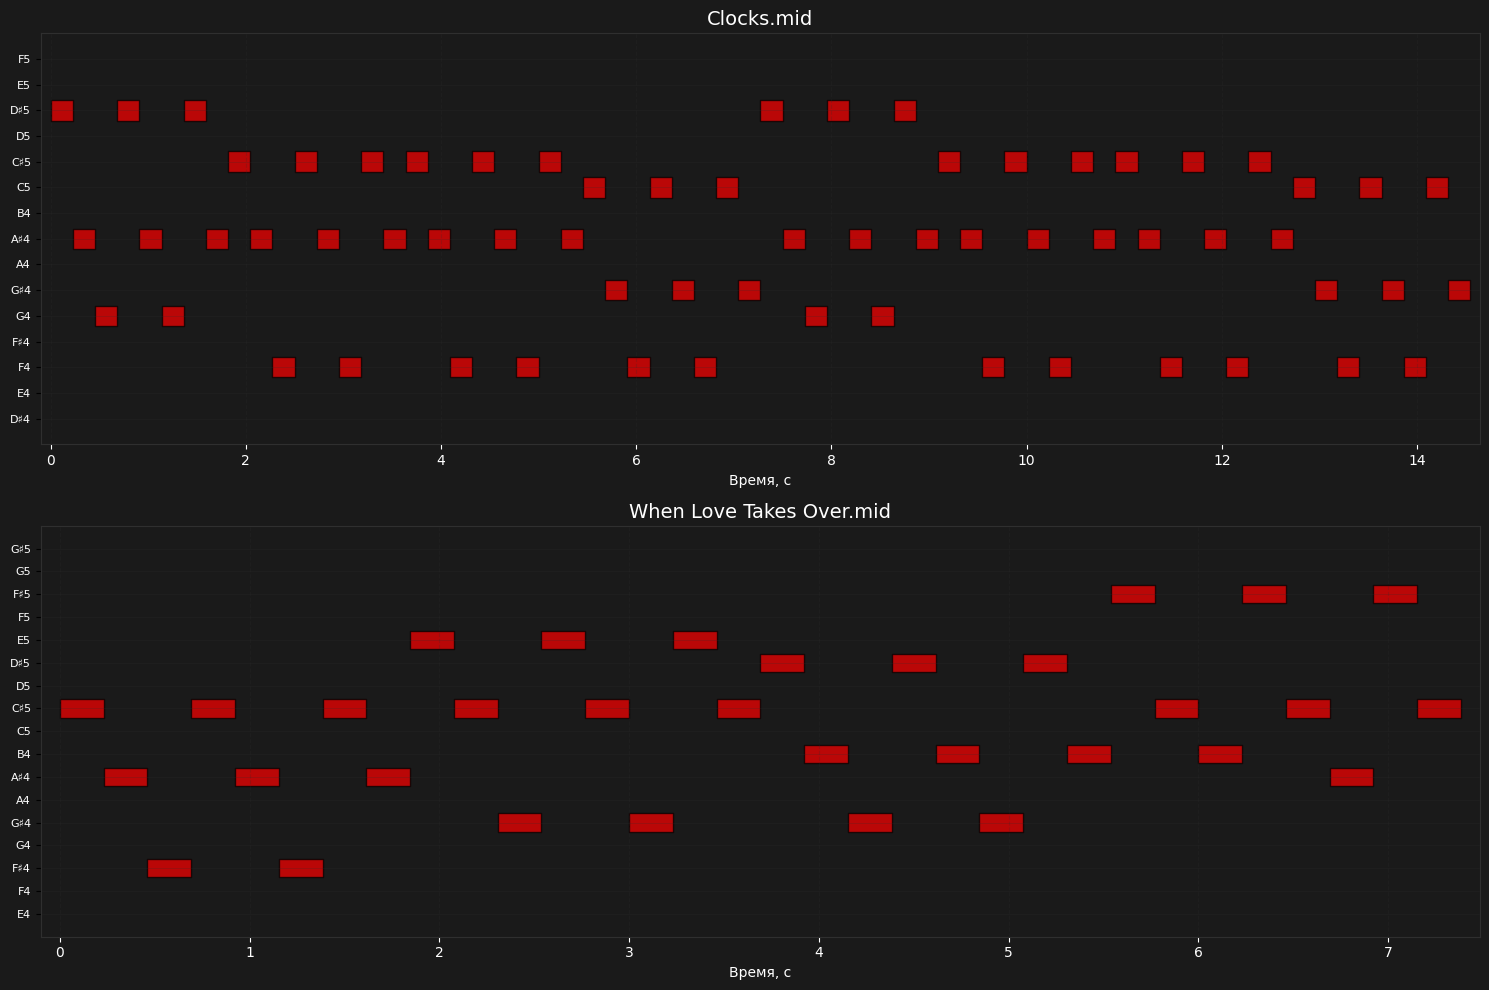

Similarity: 0.55


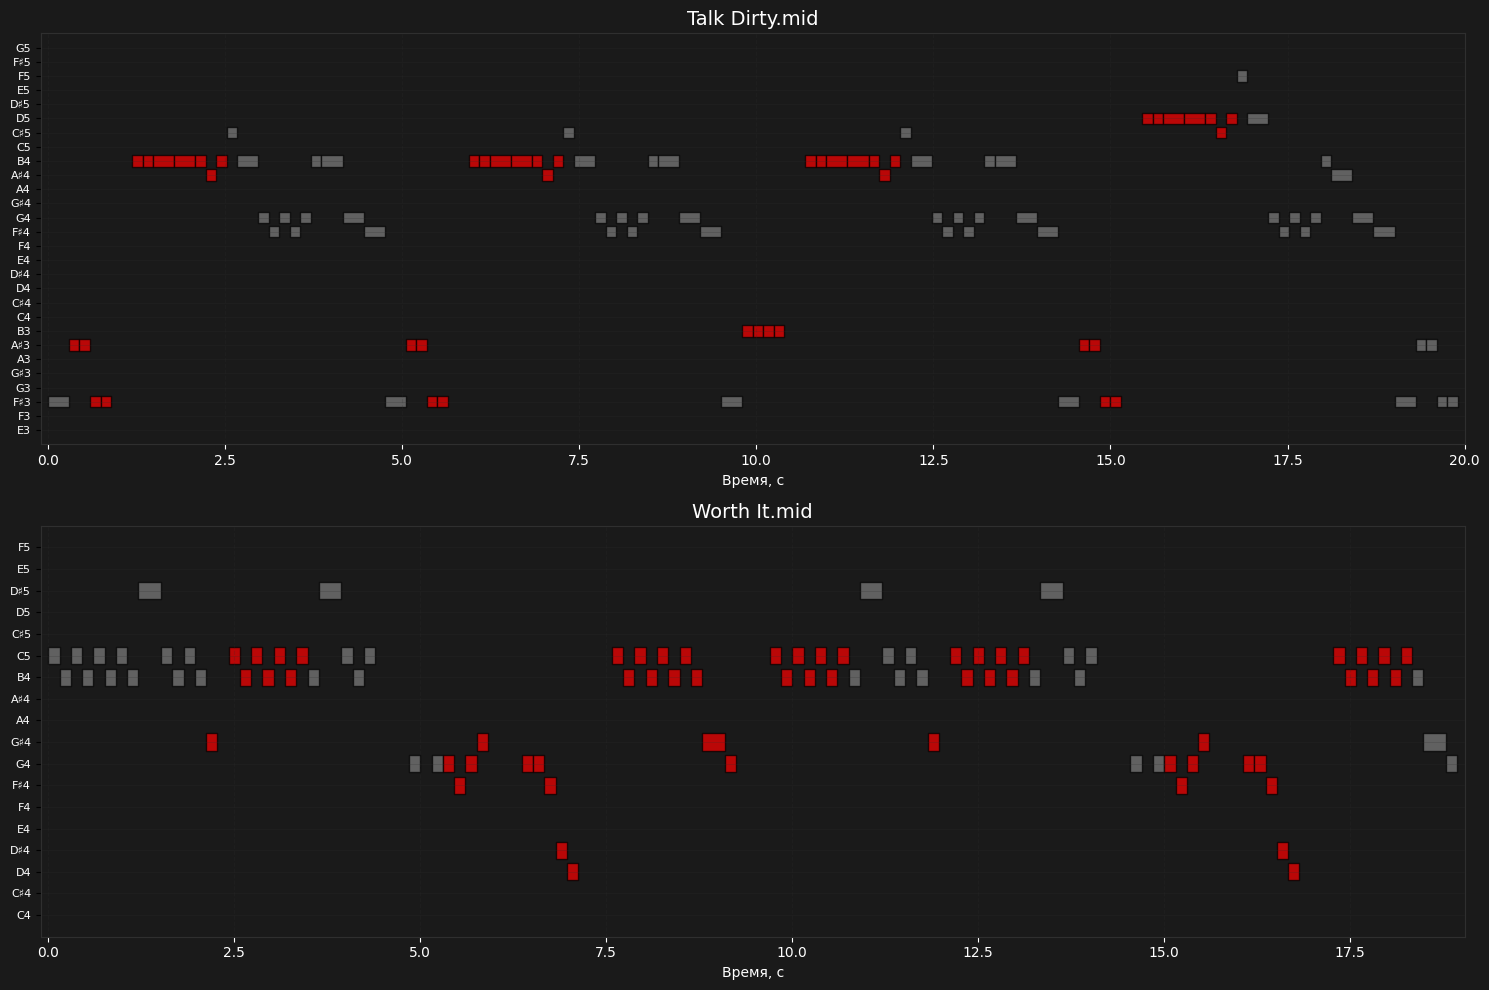

Similarity: 0.00


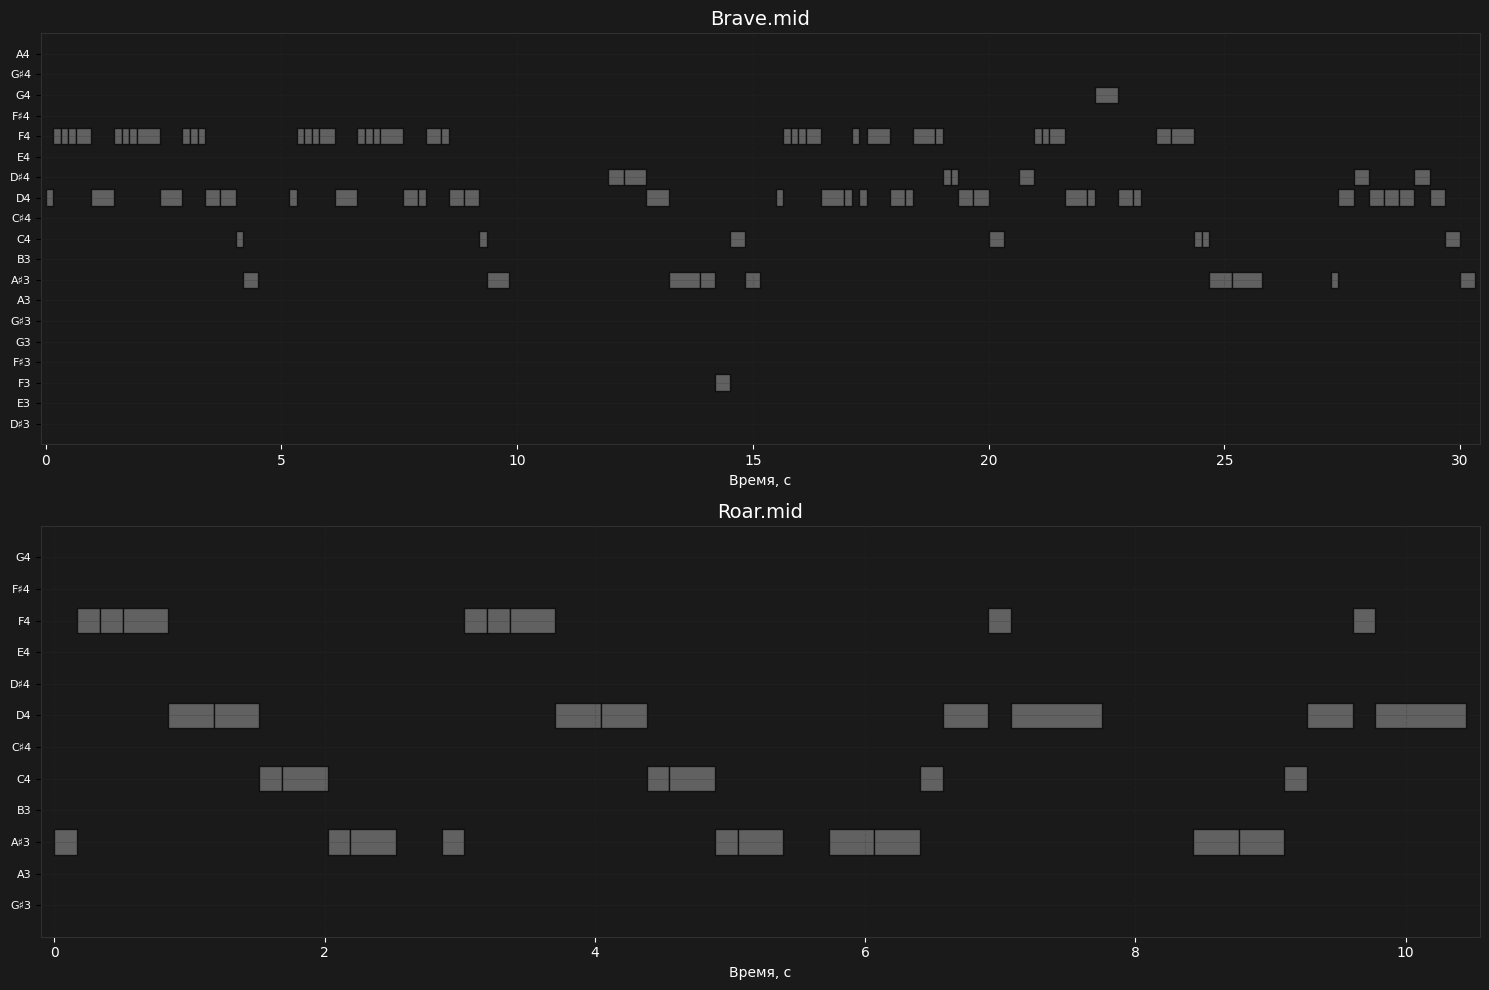

Similarity: 0.00


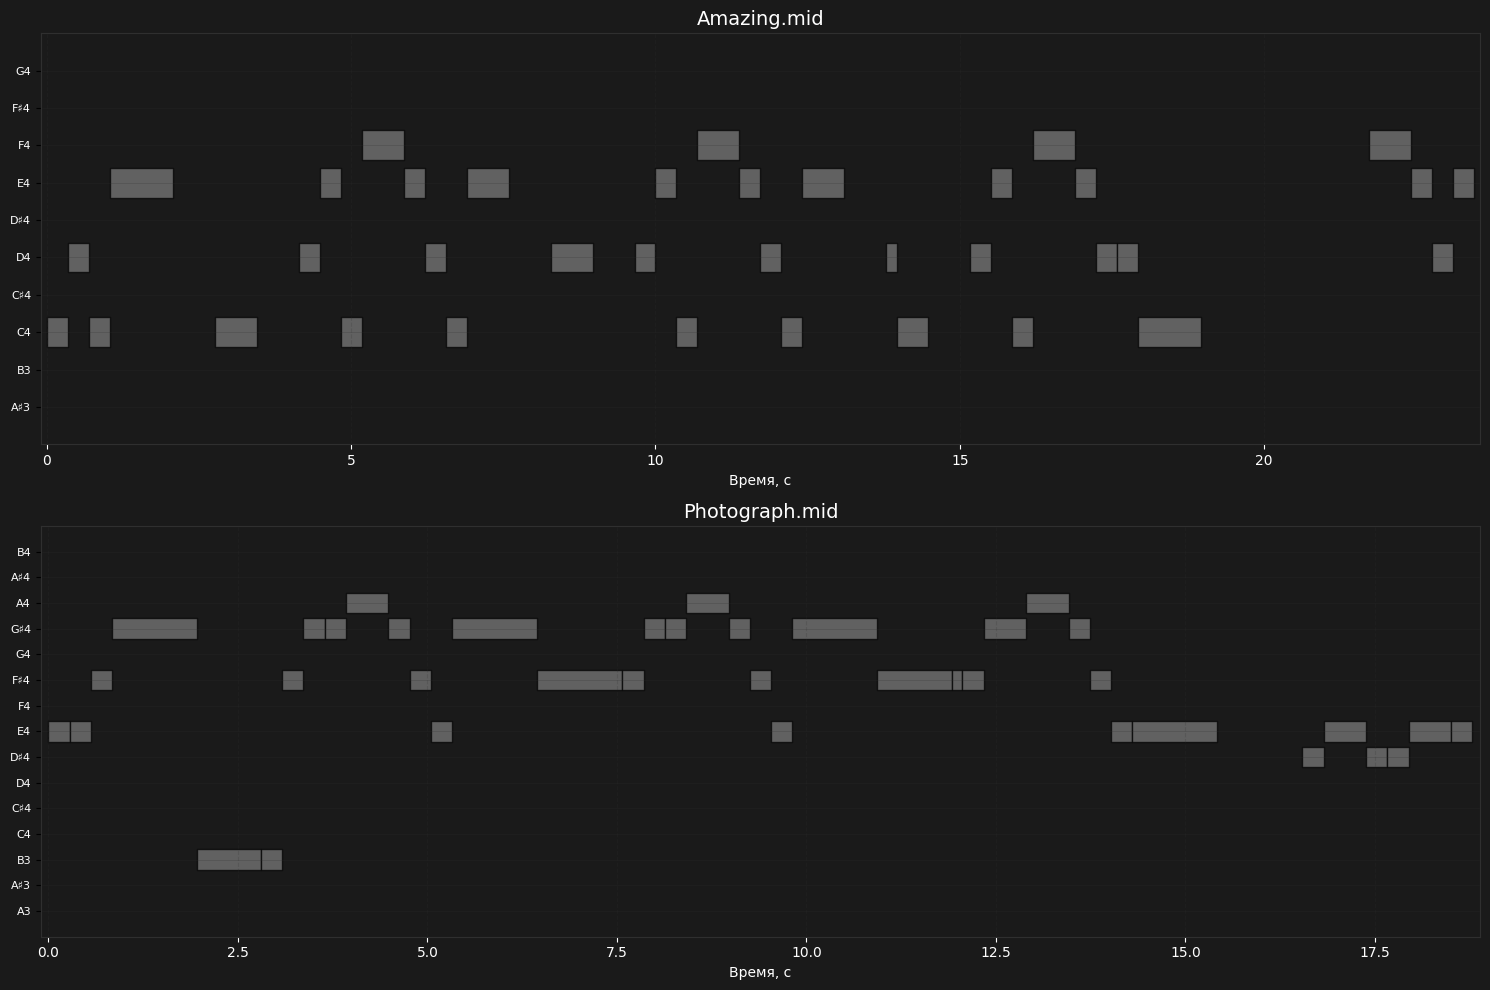

Similarity: 0.00


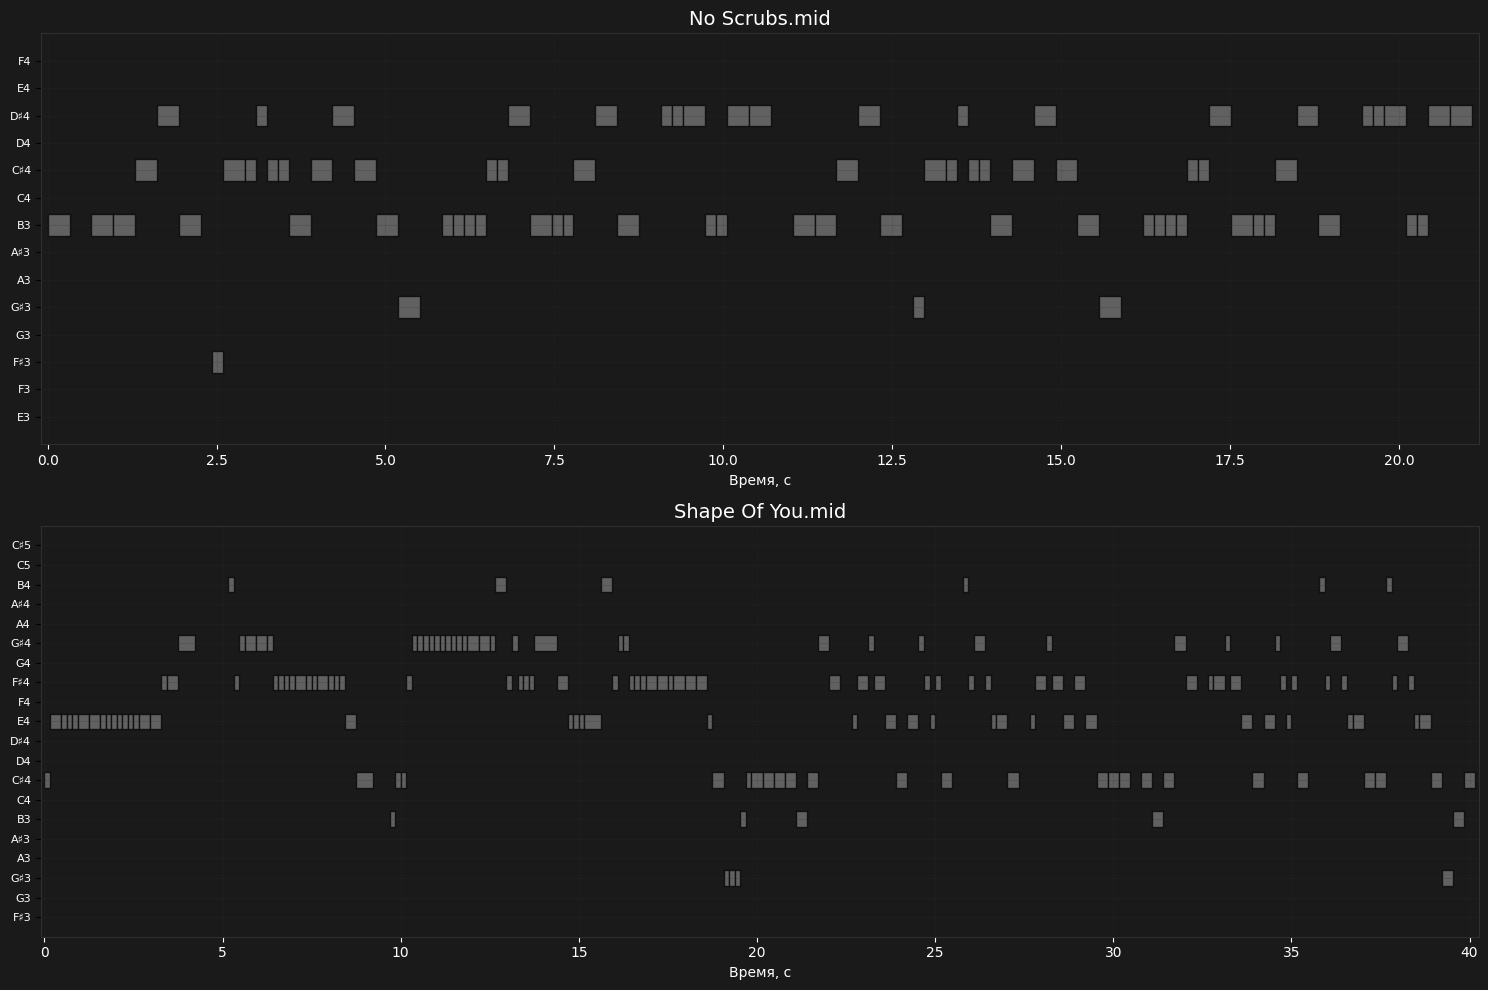

Similarity: 0.24


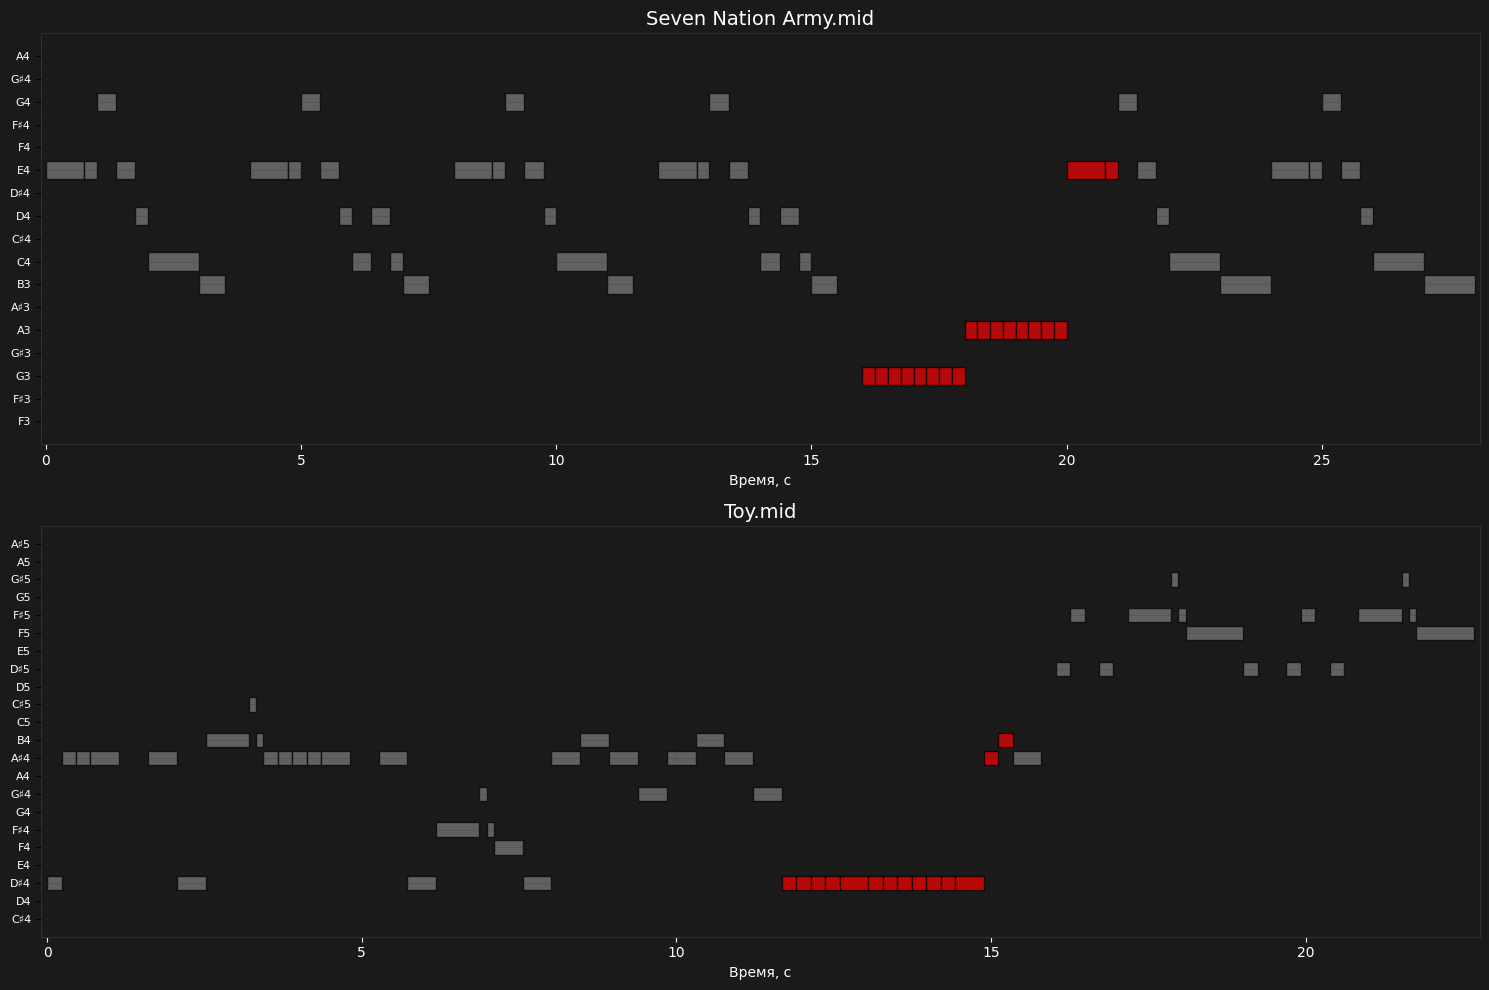

Similarity: 0.00


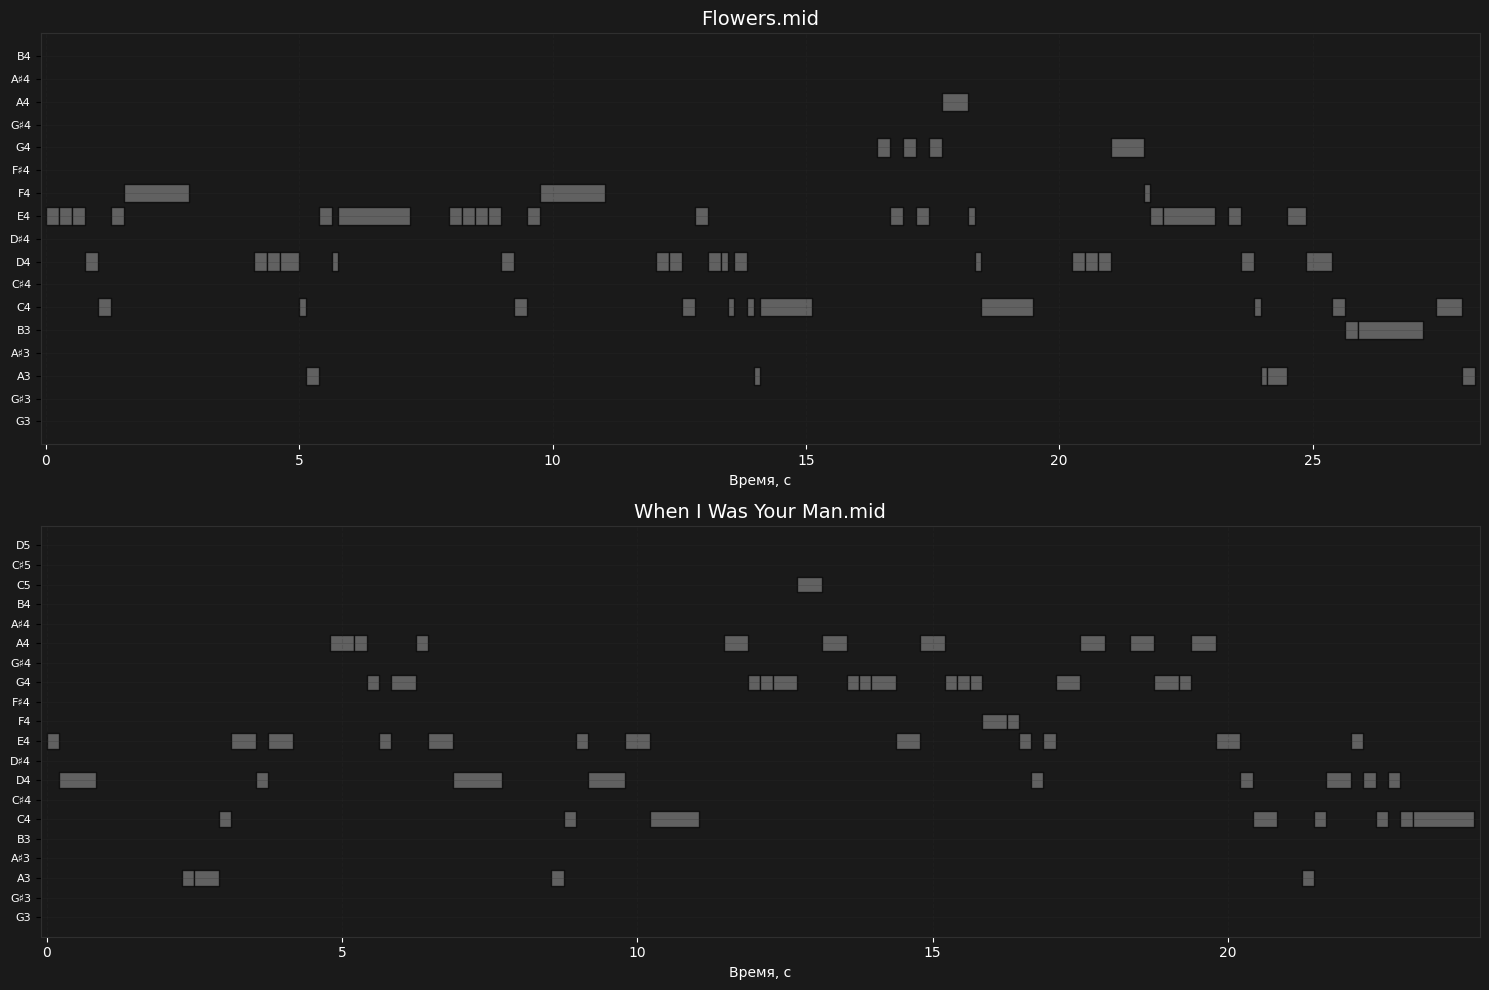

Similarity: 0.75


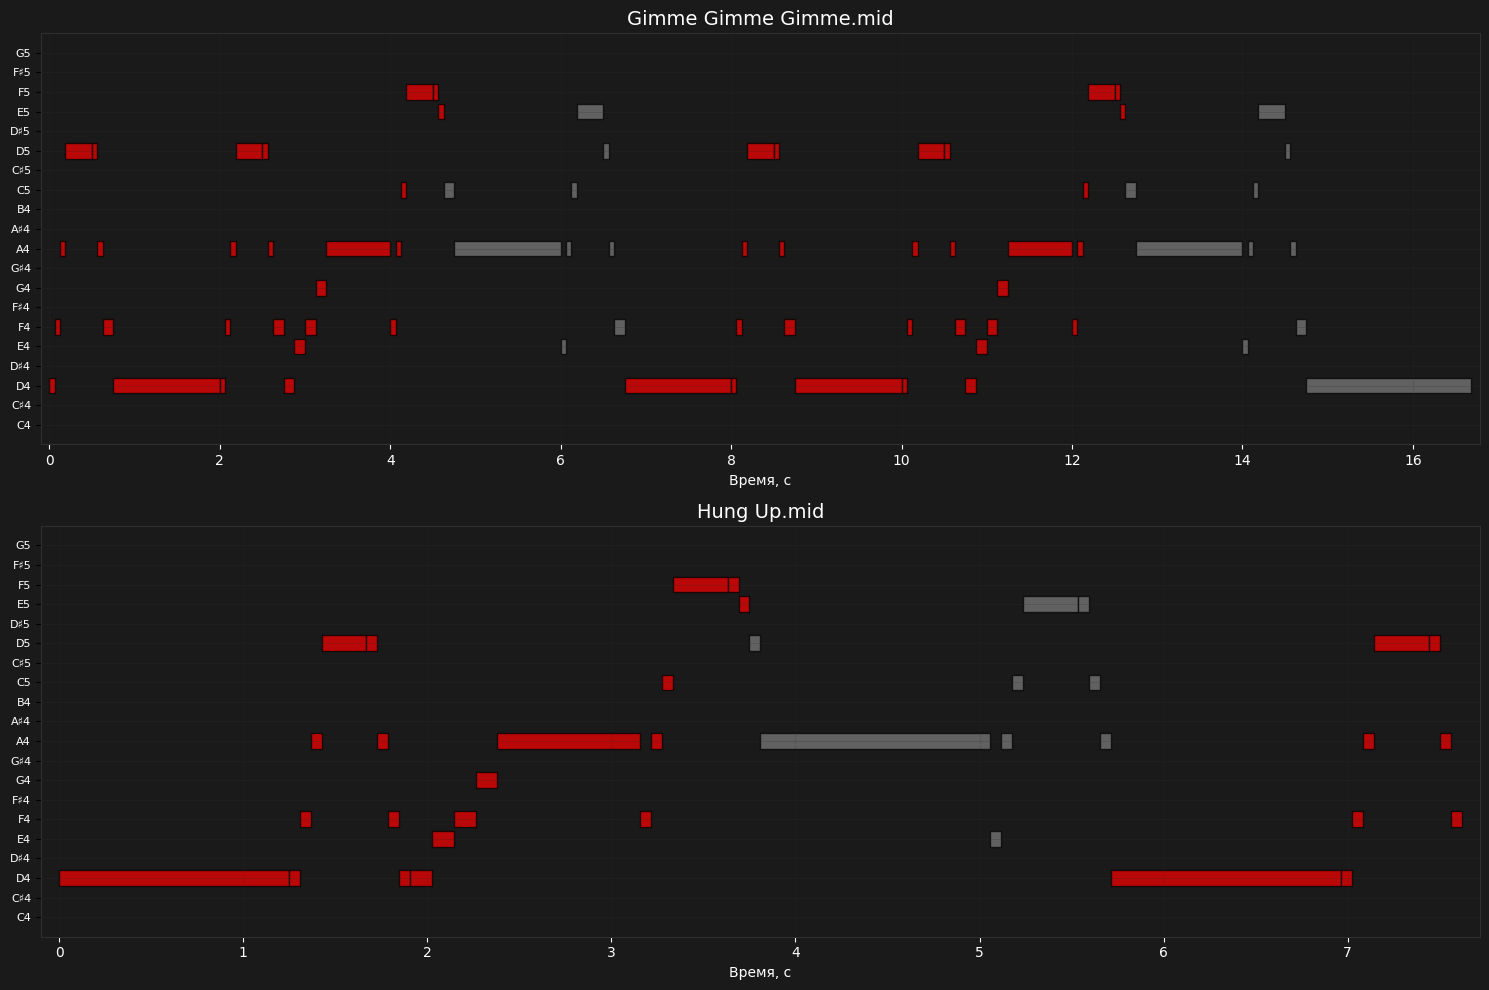

Similarity: 0.36


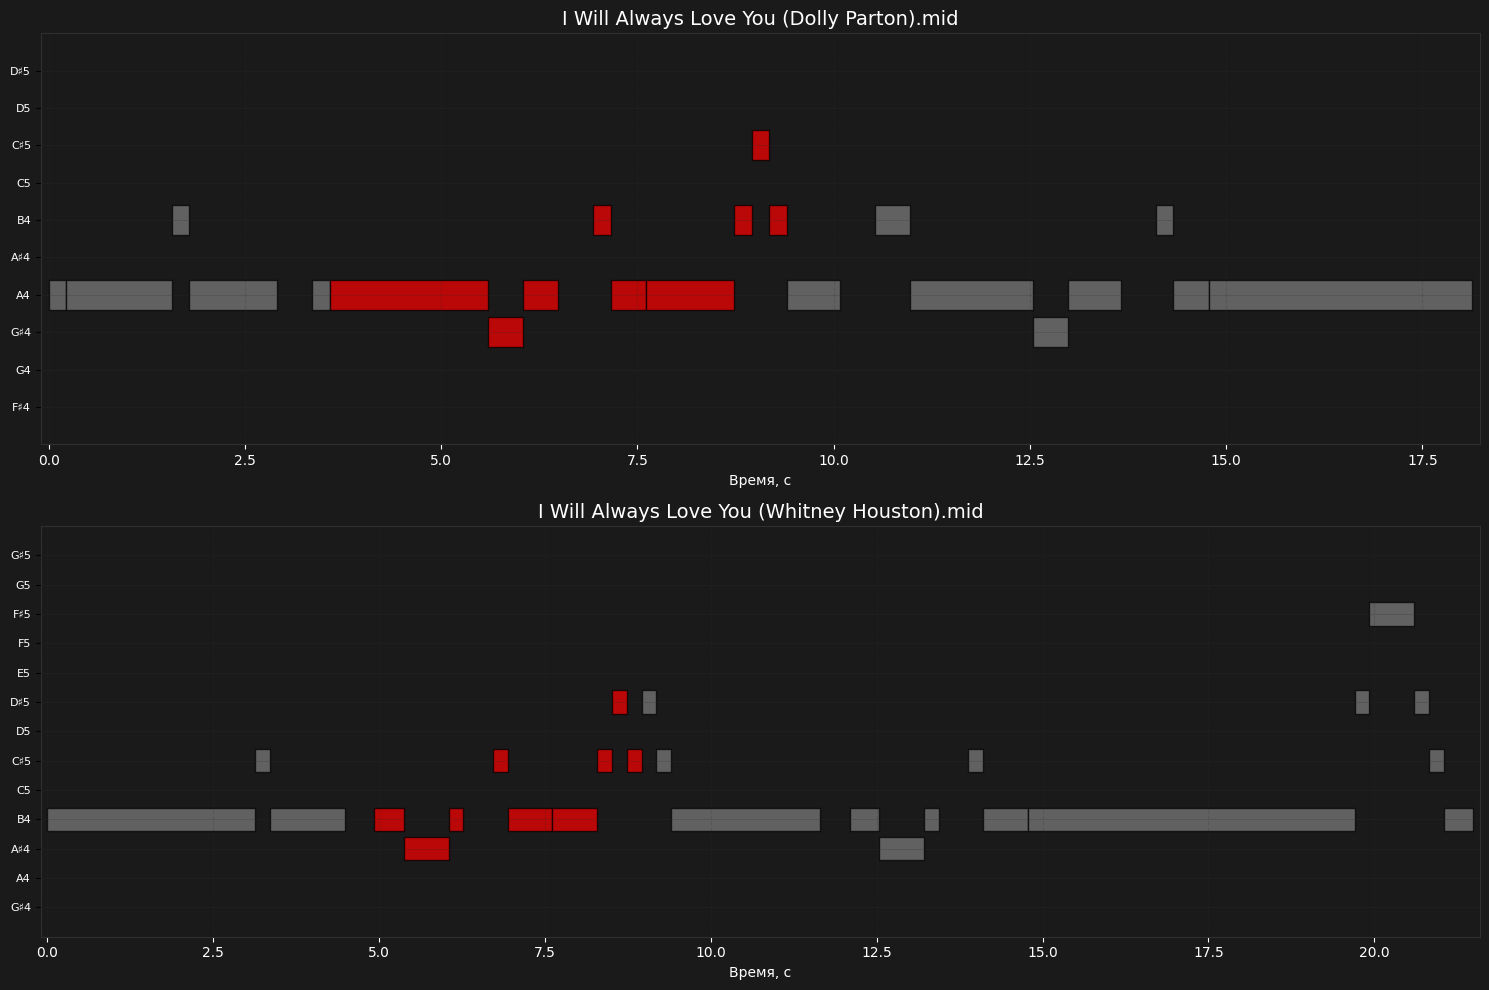

Similarity: 0.00


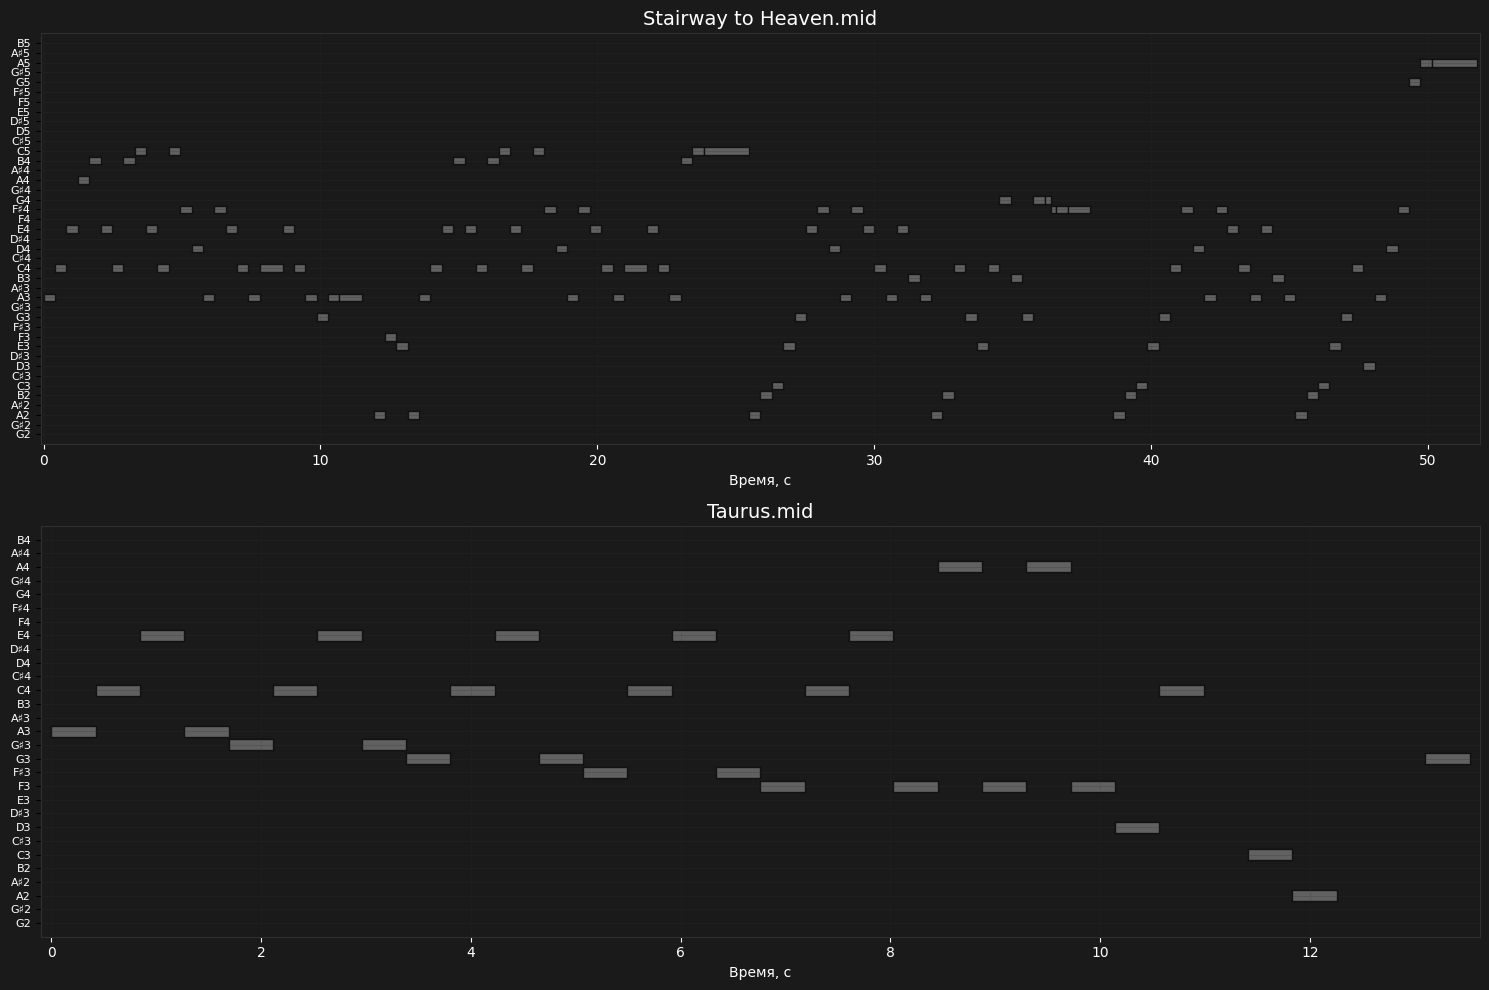

Similarity: 1.00


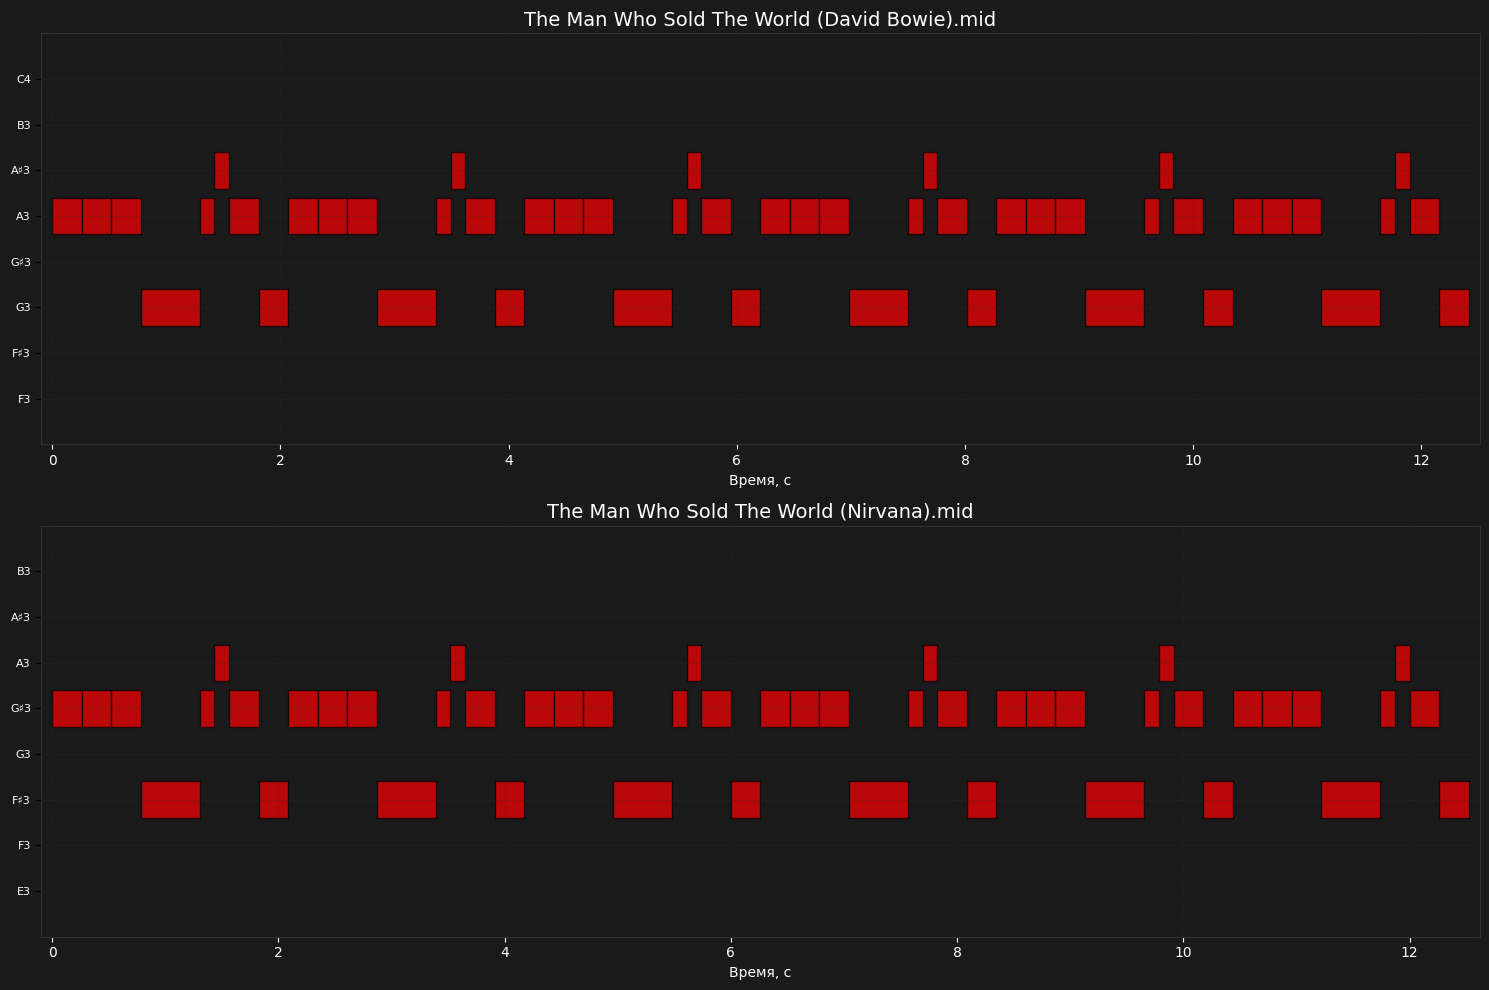

Similarity: 0.29


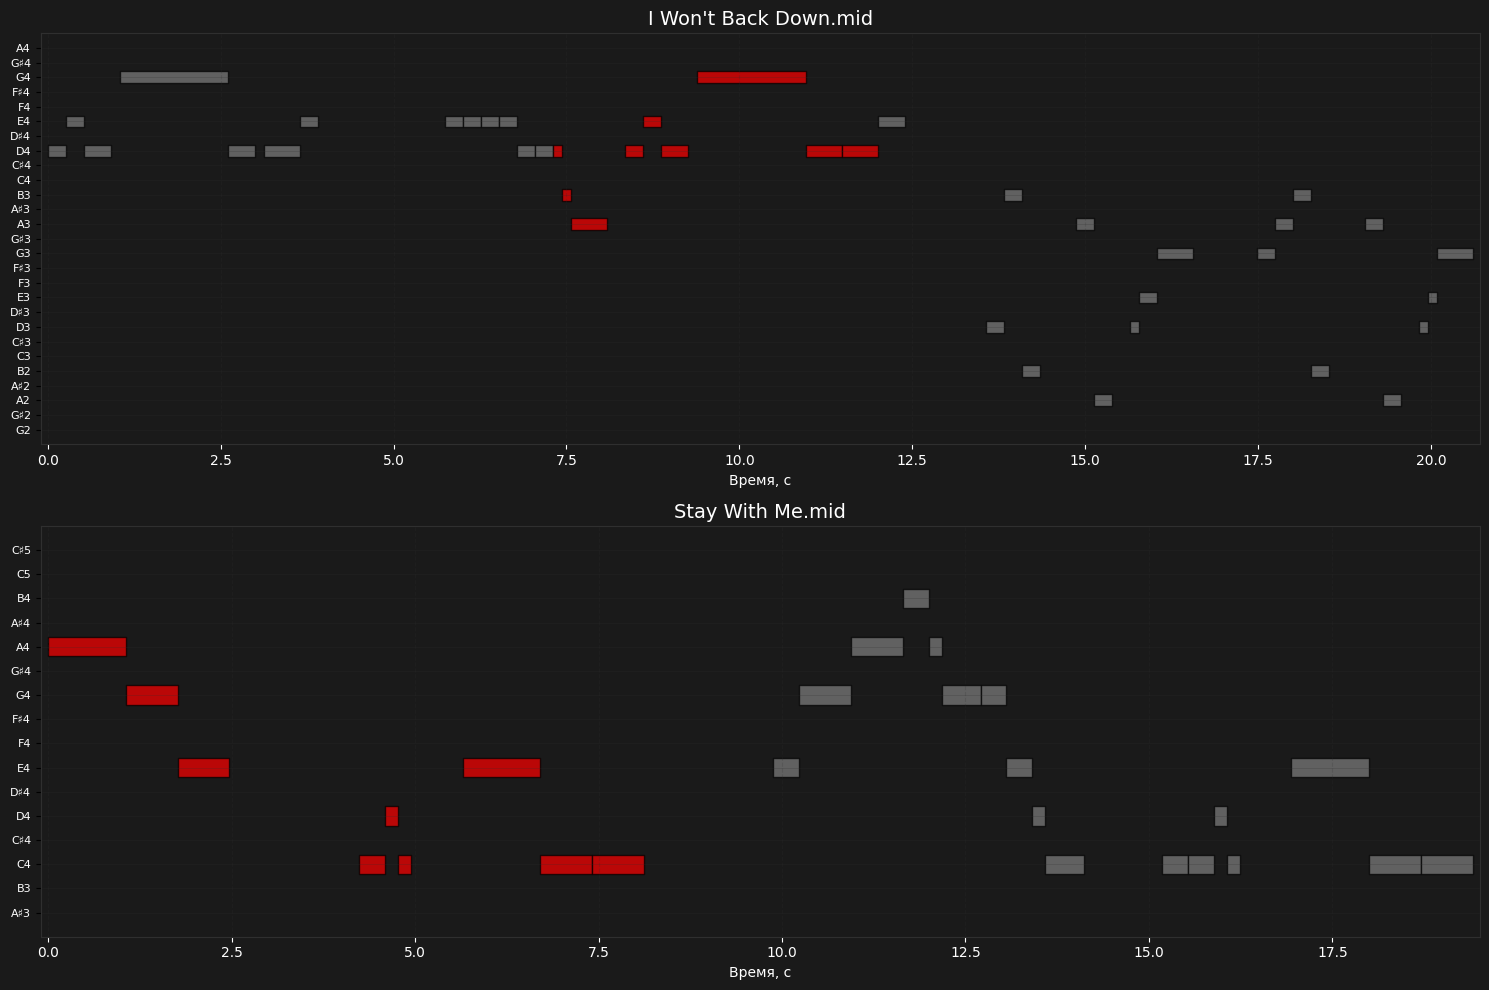

Similarity: 0.00


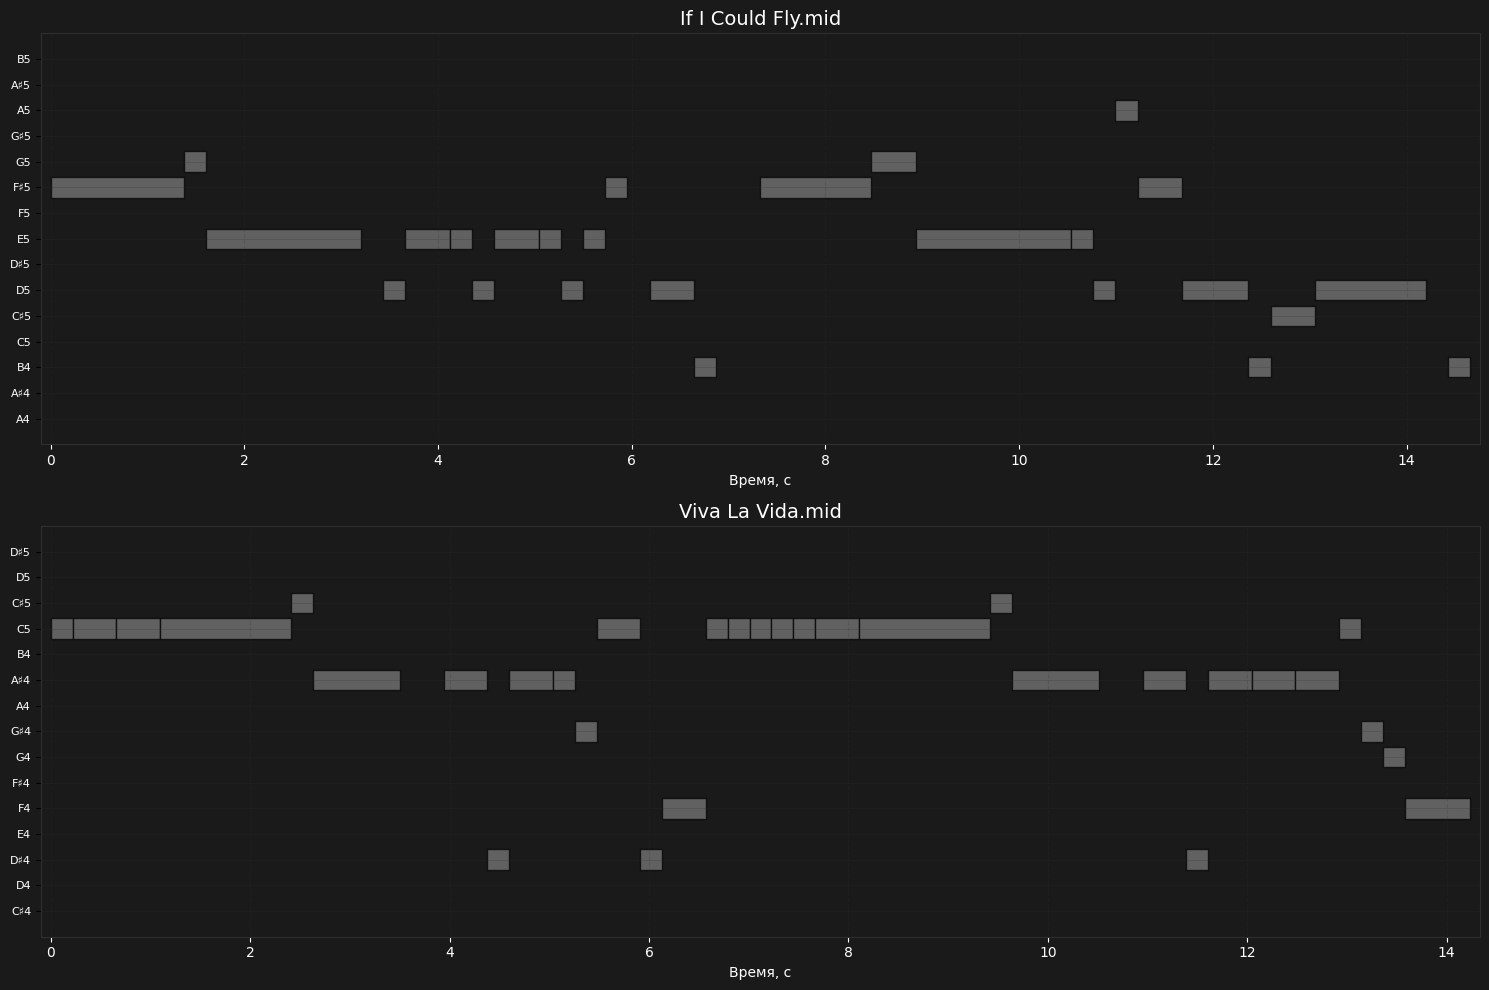

Similarity: 0.00


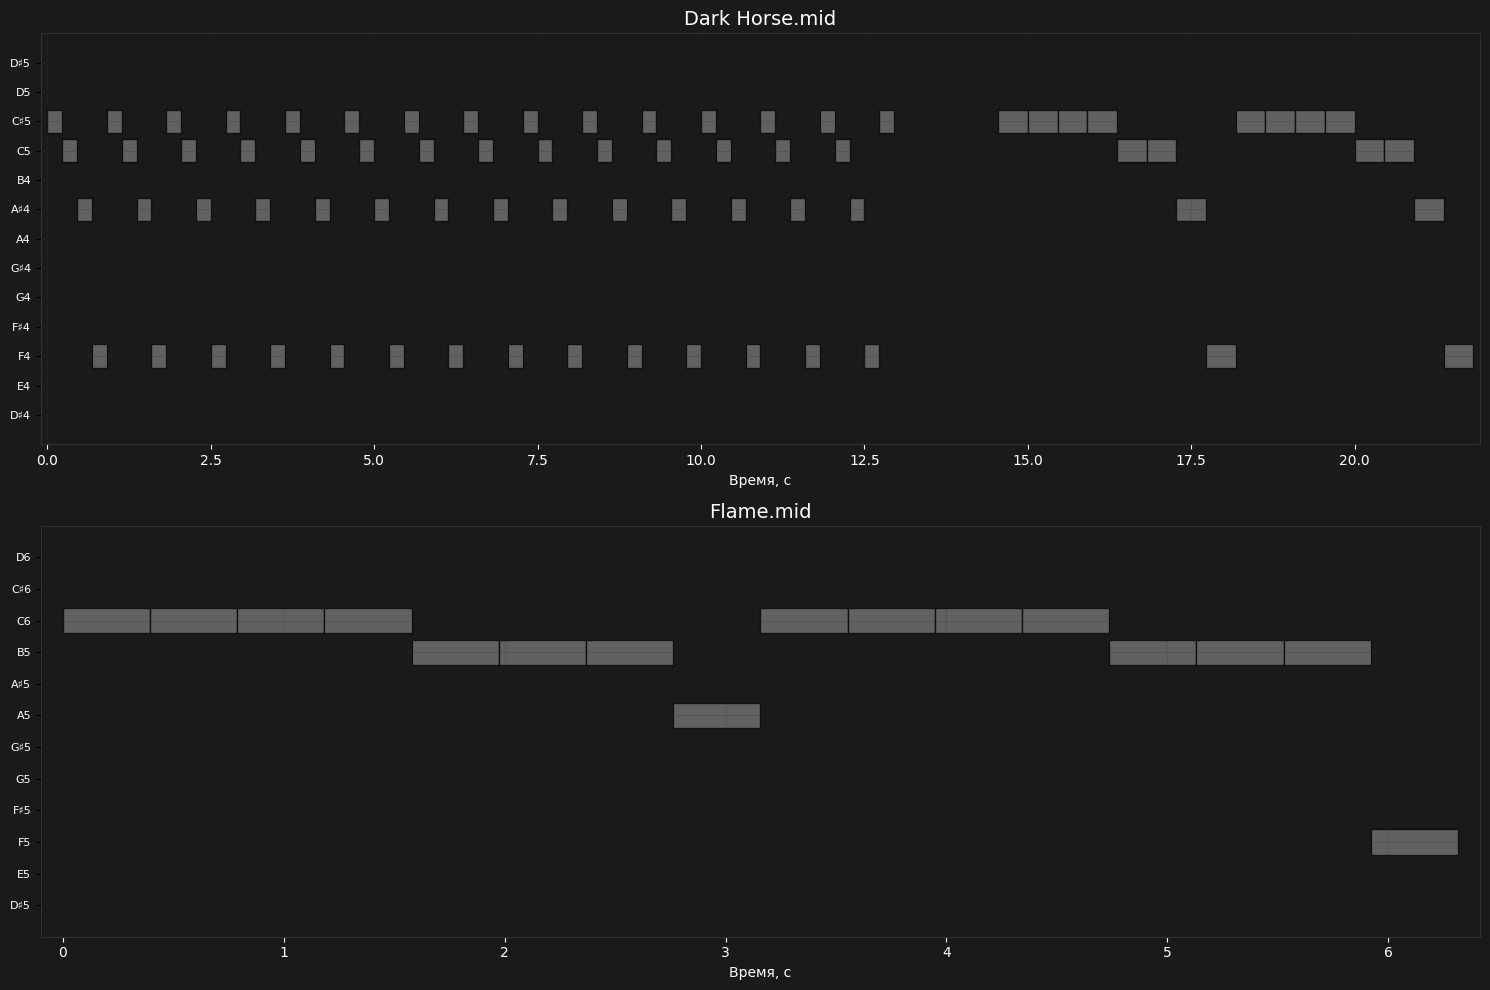

Similarity: 0.14


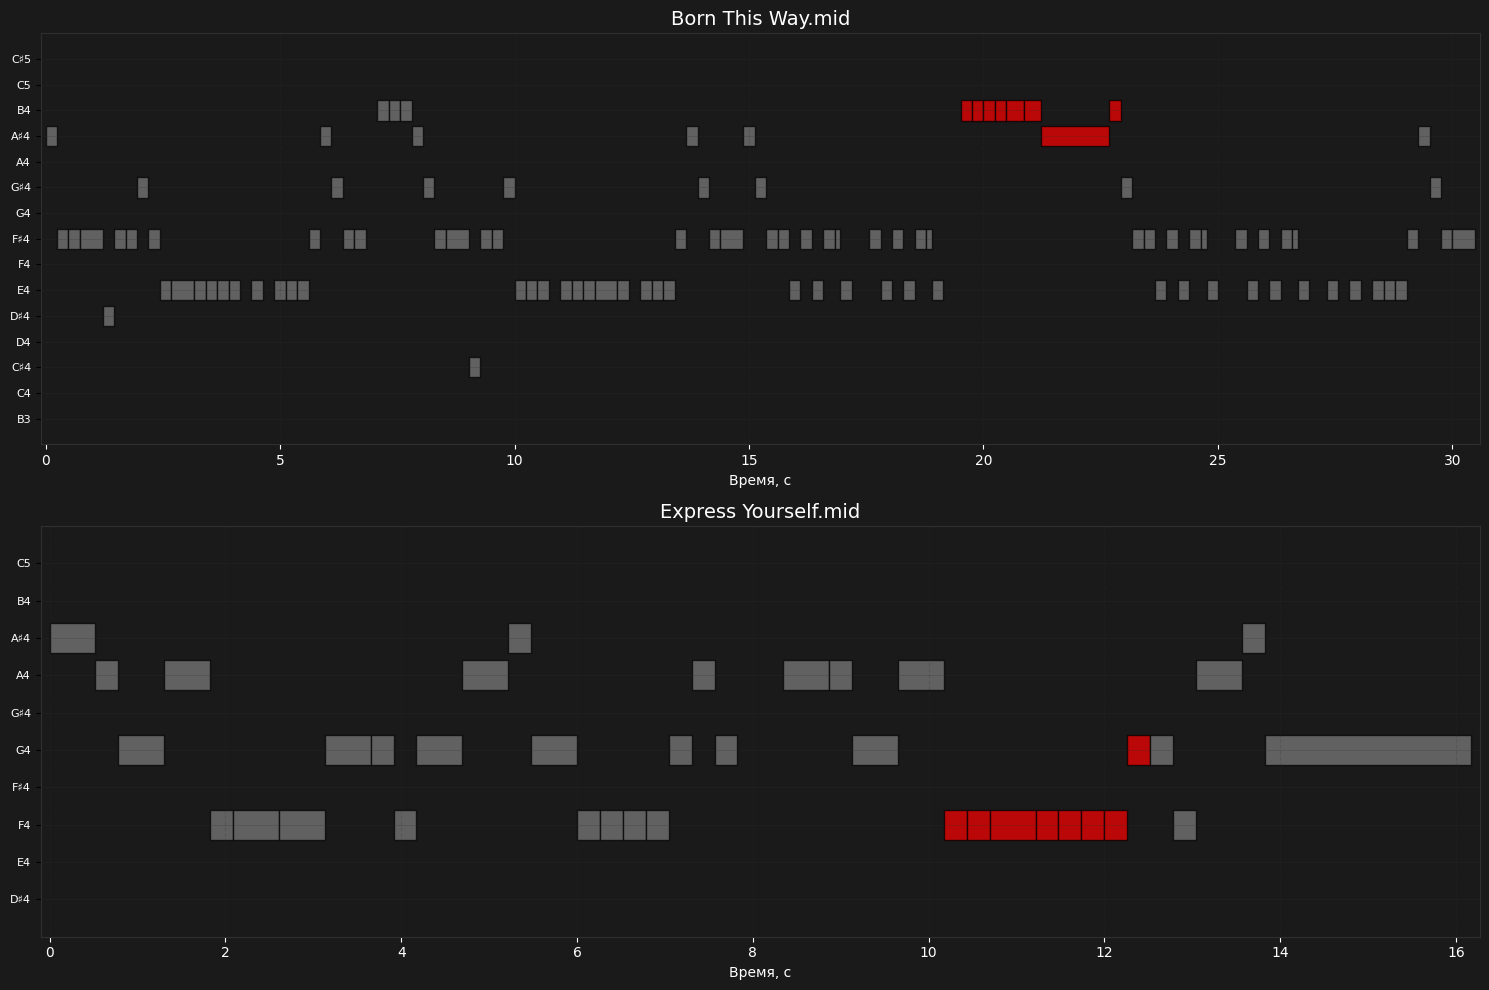

Similarity: 0.00


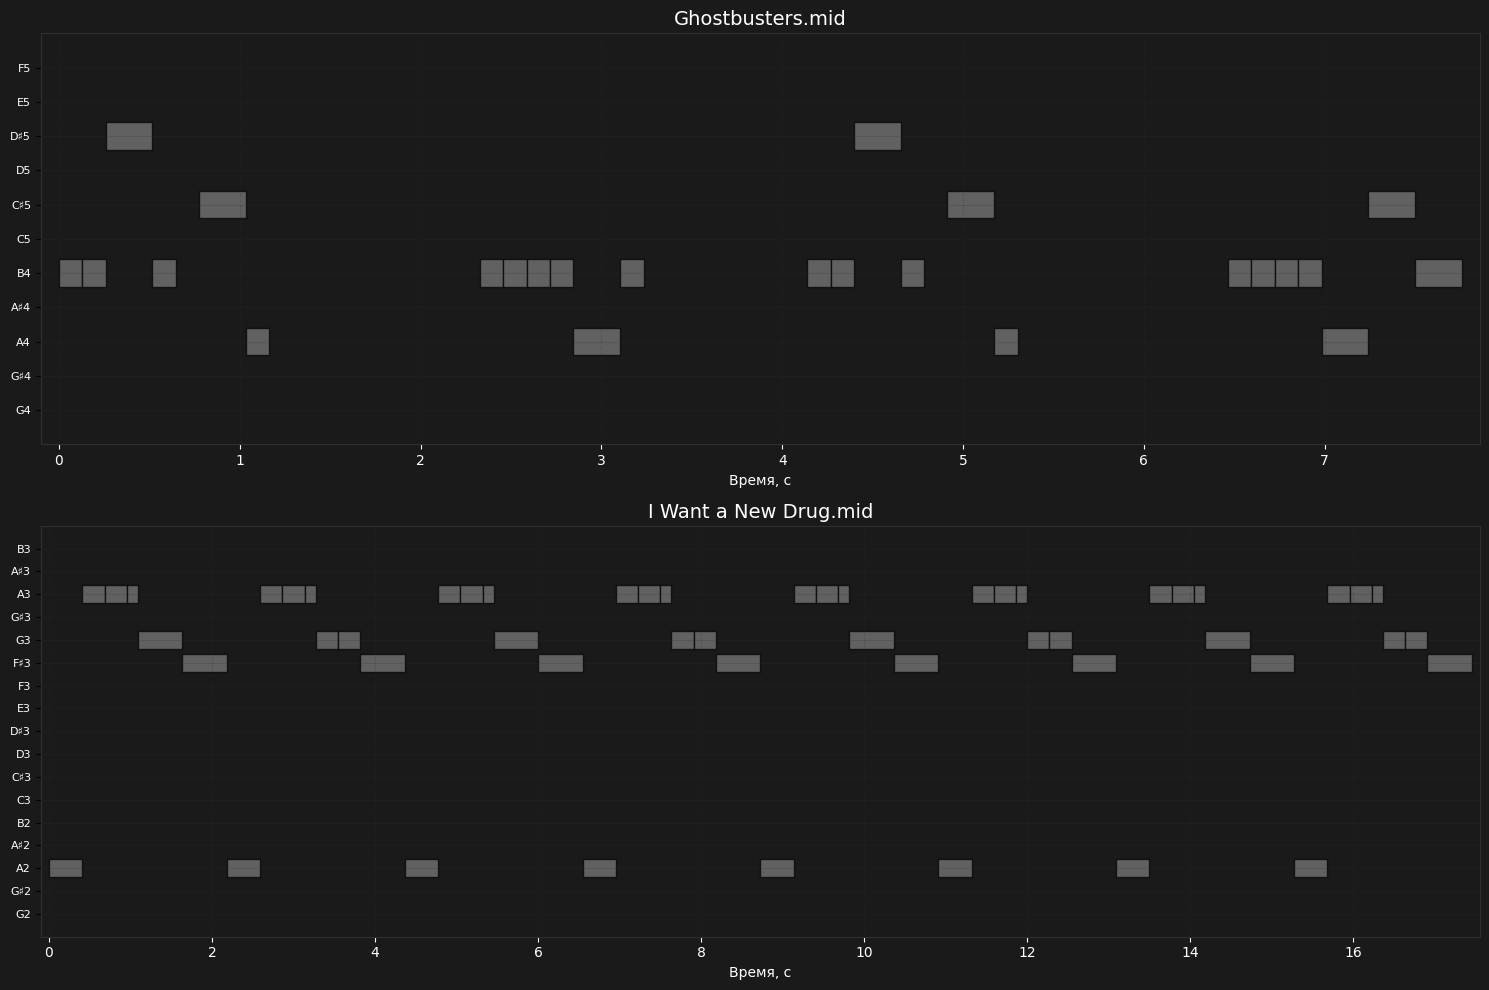

Similarity: 0.00


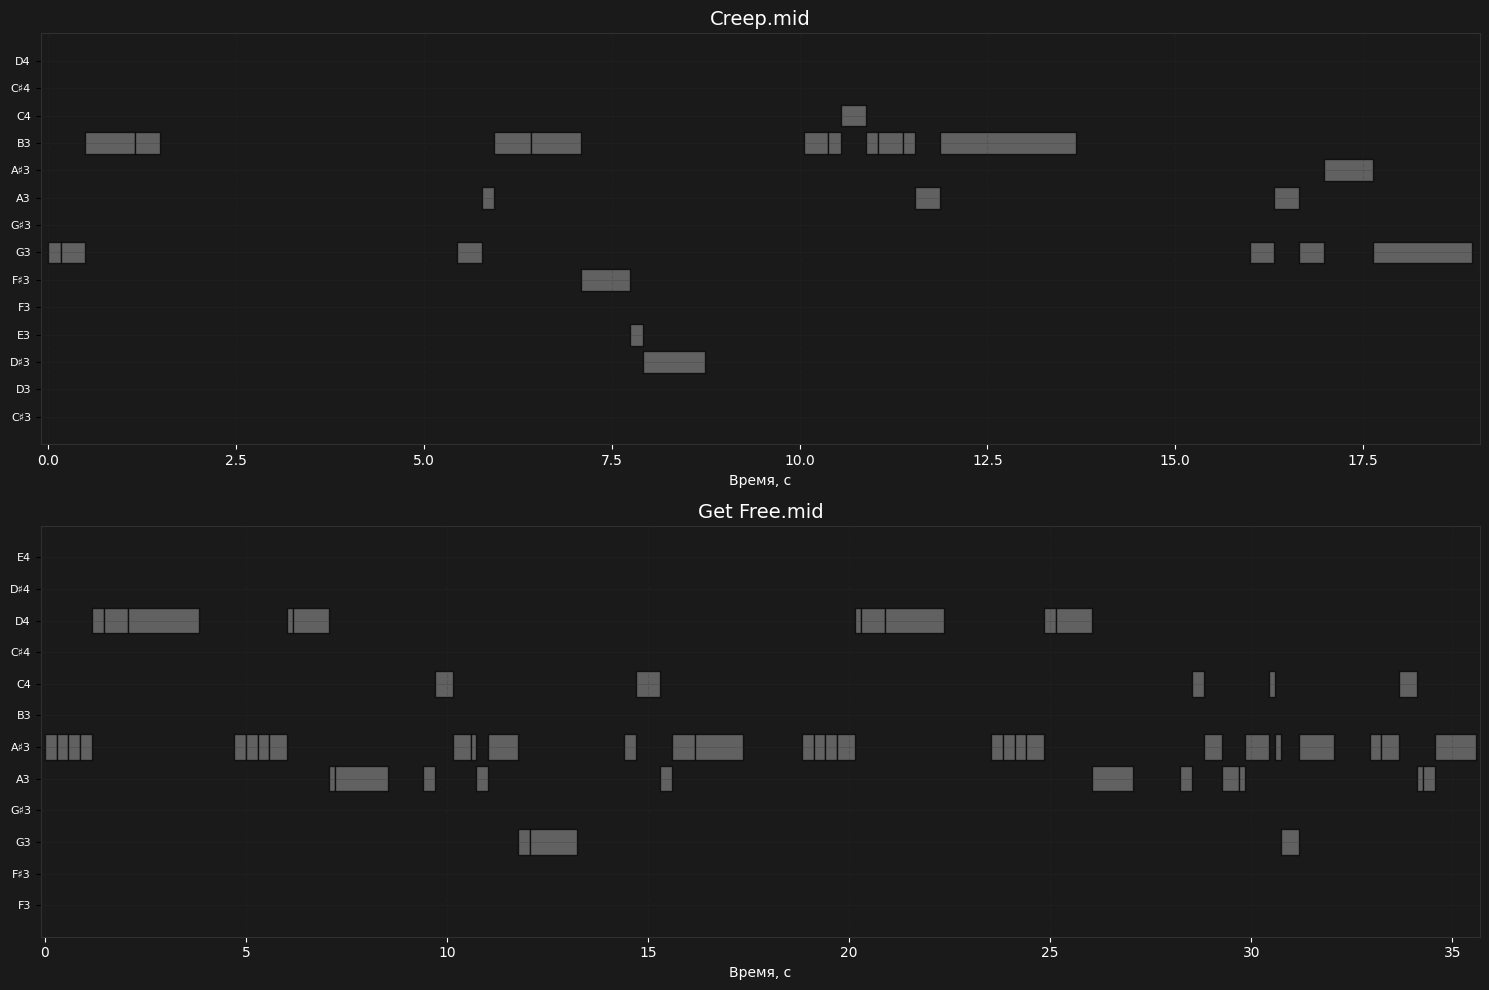

Similarity: 0.00


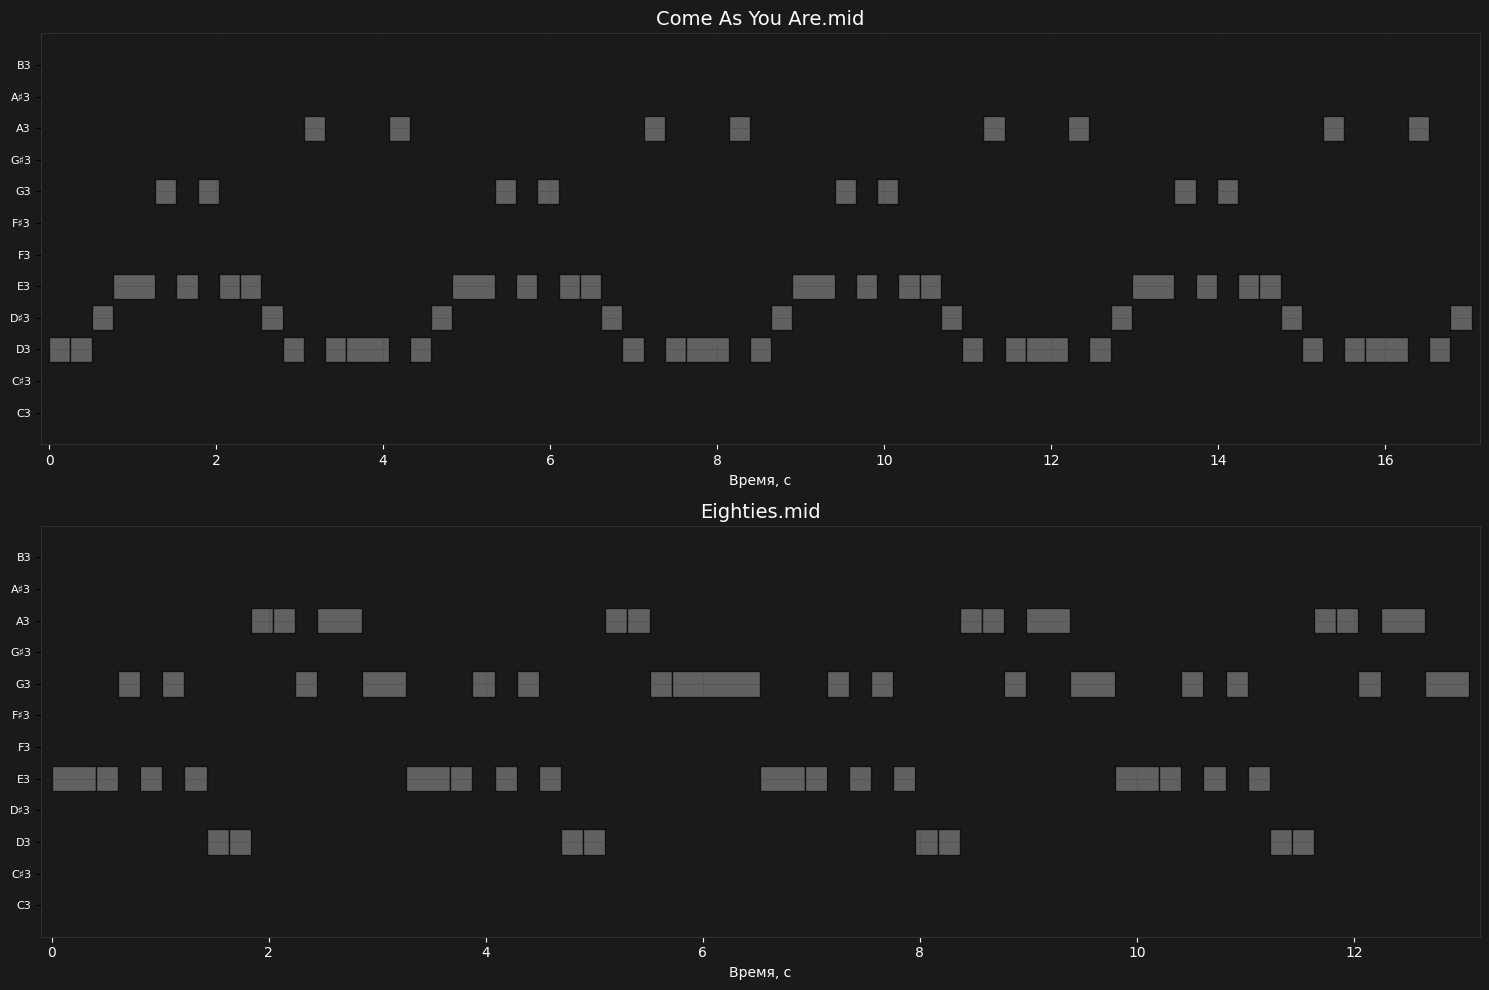

In [3]:
for case_dir in sorted(Path("..\\..\\datasets\\PlagiNet\\cases").iterdir()):

    if case_dir.is_dir():
        midi_files = list(case_dir.glob("*.mid"))

        melody1 = Melody.from_midi(midi_files[0])
        melody2 = Melody.from_midi(midi_files[1])
        
        matcher = IntervalsMelodyMatcher(melody1, melody2)
        patterns = matcher.find_patterns(min_length=7)
        
        print(f"Similarity: {matcher.calculate_similarity():.2f}")
        matcher.visualize_matches(subplot_titles=(midi_files[0].name, midi_files[1].name), subplot_title_fontsize=14)